**CLASSIFICAZIONE DI IMMAGINI CONTENTENTI DIGIT CON UNA CNN CUSTOM**

# Colab mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries 
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import model_from_json
from keras.models import load_model

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape) #Number of images, #width #height

(60000, 28, 28)


In [5]:

x_train = np.expand_dims(x_train, -1)  #Equivalente x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
print("x_train", x_train.shape)

x_test= np.expand_dims(x_test, -1) #Equivalente  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print("x_test", x_test.shape)

x_train (60000, 28, 28, 1)
x_test (10000, 28, 28, 1)


In [6]:
y_test.shape
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
x_train.dtype

dtype('uint8')

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
print("min", np.min(x_train[1]))
print("max", np.max(x_train[9]))

x_train /= 255
x_test /= 255

print("min", np.min(x_train[1]))
print("max", np.max(x_train[9]))

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

min 0.0
max 255.0
min 0.0
max 1.0
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


(28, 28)


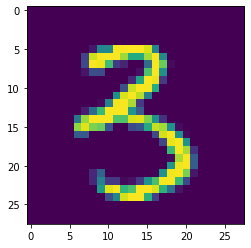

In [10]:
print(x_test[0,:,:,0].shape)
plt.imshow(x_test[5000,:,:,0])
plt.show()

In [11]:
from keras.utils import np_utils

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [12]:
y_test.shape
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
json_file = open('/content/drive/MyDrive/2023-CV&DL/Classificazione/0.ToUpload/Model.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               1179776   
                                                      

In [14]:
model.load_weights('/content/drive/MyDrive/2023-CV&DL/Classificazione/0.ToUpload/ModelWeight.h5')

In [15]:
for layer in model.layers:
  print(layer.input_shape)

(None, 28, 28, 1)
(None, 26, 26, 32)
(None, 24, 24, 64)
(None, 12, 12, 64)
(None, 12, 12, 64)
(None, 9216)
(None, 128)
(None, 128)


In [16]:
print("x_test-shape of images to predict from the testing set", x_test.shape)
y_score = model.predict(x_test)
print("y_score-shape of prediction", y_score.shape)


print("y_score from image 5000 of the test set", y_score[5000])
print("y_test of image 5000 of the test set", y_test[5000])


y_pred = np.argmax(y_score, axis = 1) #(10000,)
y_test_ = np.argmax(y_test, axis = 1) #(10000,)

x_test-shape of images to predict from the testing set (10000, 28, 28, 1)
313/313 [==============================] - 10s 3ms/step
y_score-shape of prediction (10000, 10)
y_score from image 5000 of the test set [1.5175685e-14 8.5953201e-13 1.0689350e-10 9.9999845e-01 1.1339051e-12
 1.4424013e-06 3.5687788e-14 4.3623383e-10 6.2988704e-08 6.4478312e-10]
y_test of image 5000 of the test set [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [17]:
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



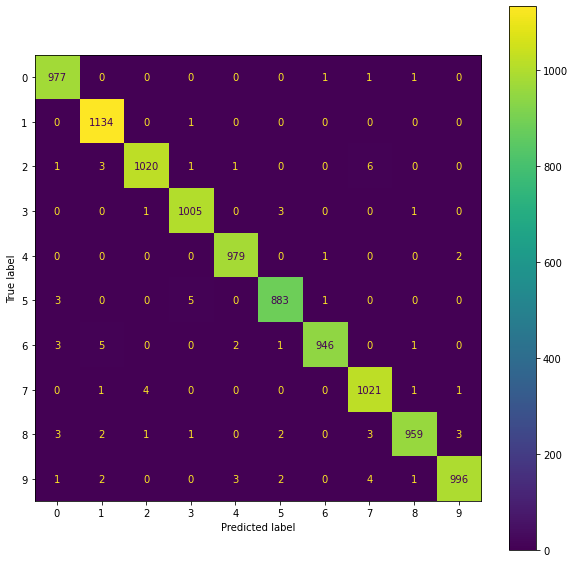

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))

disp.plot(ax=ax)